# Exploring Structure and Patterns in the USArrests Dataset Using Unsupervised Machine Learning Techniques

In this project, we will explore the 'USArrests' dataset to uncover meaningful insights regarding its underlying structure and patterns. We will employ various unsupervised machine learning techniques, including Principal Component Analysis (PCA), K-Nearest Neighbors (KNN), and hierarchical clustering.

These techniques are selected for their ability to reveal the intrinsic relationships and groupings within the data without prior labels. PCA will help us reduce dimensionality, making it easier to visualize and interpret the dataset while preserving its essential features. KNN will be used to identify similarities between observations based on their attributes, while hierarchical clustering will allow us to group the data into clusters based on their similarities. Through this analysis, we aim to enhance our understanding of the data and demonstrate our proficiency in applying these methodologies.



In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Import libraries for unsupervised machine learning techniques
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.cluster import KMeans  # For K-Means clustering
from sklearn.metrics import silhouette_score  # For evaluating clustering performance
from scipy.cluster.hierarchy import dendrogram, linkage  # For hierarchical clustering
from sklearn.cluster import AgglomerativeClustering  # For agglomerative clustering

# Import libraries for data visualization
import seaborn as sns  # For advanced data visualization
import matplotlib.pyplot as plt  # For basic plotting

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('UsArrests.csv')  # Reading the CSV file containing US Arrests data

# Display the first five rows of the DataFrame to get an overview of the dataset
df.head()


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Initial Data Exploration and Preprocessing Overview

In [3]:
# Get the shape of the DataFrame (number of rows and columns)
print(df.shape)
print()  # Print a newline for better readability

# Get information about the DataFrame, including data types and non-null counts
print(df.info())
print()  

# Print the shape of the DataFrame again (redundant, can be removed)
print(df.shape)
print()  

# Check for missing data in the DataFrame
print(df.isnull().sum())
print()  

# Get statistical properties of the DataFrame, focusing on relevant rows
stat = df.describe()  # Get descriptive statistics for all numerical columns
rel_stats = stat.loc[["mean", "std", "min", "max"]].transpose()  # Extract specific rows
print(rel_stats)  # Print the selected statistical properties


(50, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None

(50, 5)

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

             mean        std   min    max
Murder      7.788   4.355510   0.8   17.4
Assault   170.760  83.337661  45.0  337.0
UrbanPop   65.540  14.474763  32.0   91.0
Rape       21.232   9.366385   7.3   46.0


In [4]:
# Set 'City' column as the index for better data organization
df.set_index('City', inplace=True)


### Histograms of Feature Distributions

This section presents histograms for each feature in the dataset, providing a visual representation of their distributions. Analyzing these distributions helps identify patterns, outliers, and the underlying data characteristics, which are essential for understanding the dataset and informing further analysis.


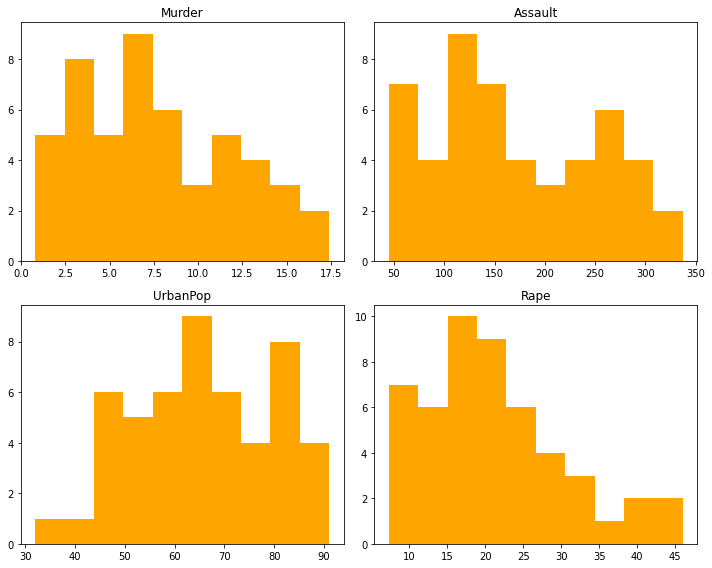

In [5]:
# Plot histograms for each feature in the dataset
df.hist(grid=False, figsize=(10, 8), color='orange')
plt.tight_layout()  # Adjusts subplot parameters for a neat layout
plt.show()  # Displays the histograms


### Analysis of Histograms in the 'US Arrests' Dataset

The 'US Arrests' dataset consists of 50 rows and 5 columns, highlighting significant variations across the variables. The mean values for the four crime-related variables—Murder, Rape, Assault, and UrbanPop—demonstrate diverse distributions, suggesting that each variable reflects different patterns of criminal activity and urban population demographics.

Additionally, the variance among these variables varies considerably, indicating differing levels of dispersion within the dataset. Notably, the "UrbanPop" variable, which represents the percentage of the urban population in each state, exhibits a distinct distribution compared to the crime rates (Murder, Rape, and Assault) measured per 100,000 individuals. This suggests that urban population dynamics may not directly correlate with crime rates.

Importantly, the dataset is free of null values, ensuring data completeness and reliability for further analysis.


### In-Depth Analysis of Crime Rates and Urban Population Across Cities

This section focuses on examining the relationships between crime rates—specifically murder, rape, and assault—and the urban population across different cities. By analyzing these variables, we aim to uncover patterns and trends that may provide insights into how urbanization influences crime dynamics. Understanding these relationships is crucial for developing effective strategies for crime prevention and urban planning.


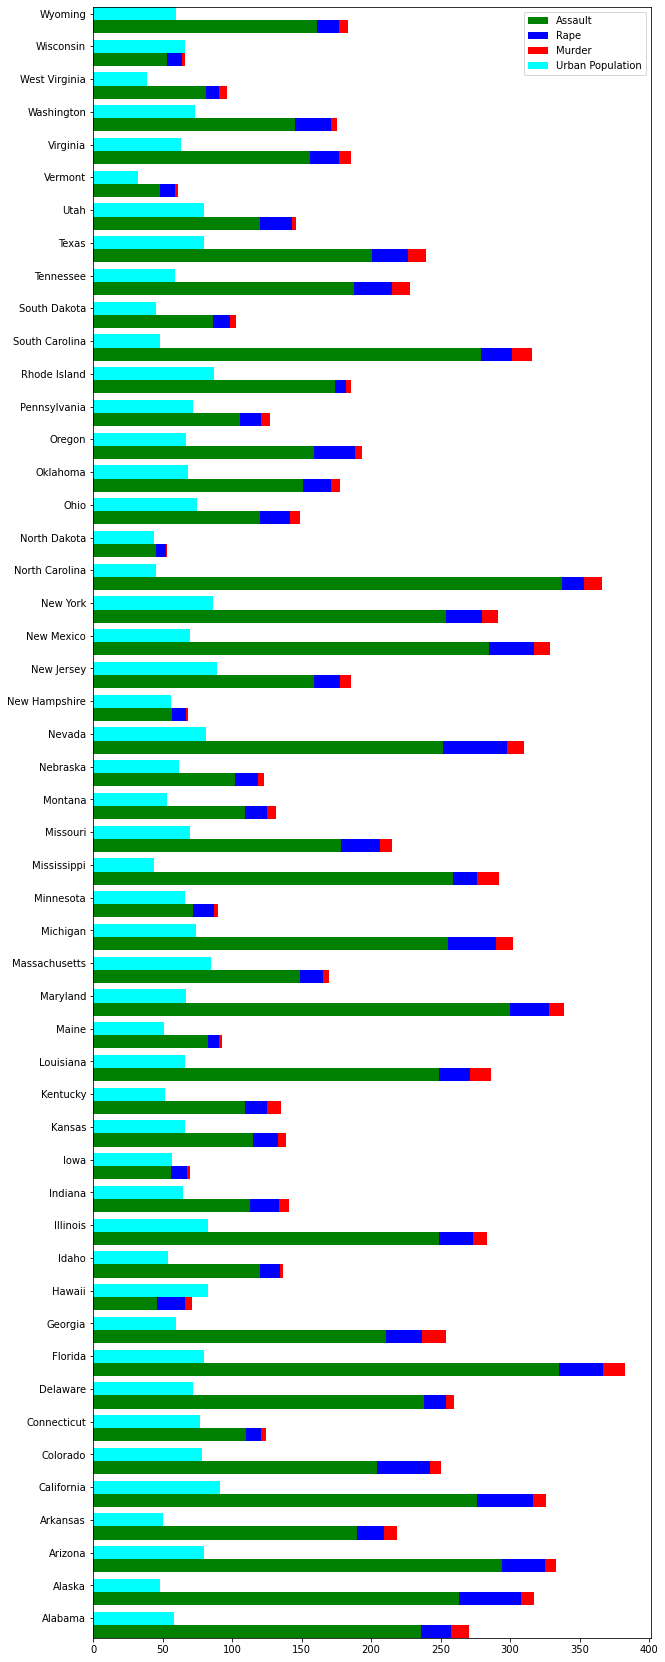

In [6]:
# Set up the figure and axes for the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 30))

# Define the y-tick locations based on the number of rows in the dataframe
y = np.arange(len(df.axes[0]))  # The label locations
bar_height = 0.4  # The height of the bars

# Set the position of the bars on the y-axis
bar_positions = y - bar_height

# Create horizontal bars for each crime type and urban population
assault = ax.barh(bar_positions, df.Assault, bar_height, color='g')
rape = ax.barh(bar_positions, df.Rape, bar_height, color='b', left=df.Assault)
murder = ax.barh(bar_positions, df.Murder, bar_height, color='r', left=df.Assault + df.Rape)
urban_pop = ax.barh(bar_positions + bar_height, df.UrbanPop, bar_height, color='cyan')

# Set y-ticks to align with the bars
ax.set_yticks(y)  # Set the y-ticks to be at the same position as the bars
ax.set_yticklabels(df.axes[0])  # Set the y-tick labels to be the city names from the dataframe

# Add a legend to identify each color
plt.legend(['Assault', 'Rape', 'Murder', 'Urban Population'])

# Adjust the margins for better visualization
plt.margins(y=0)

# Display the plot
plt.show()


### Insights from the Bar Chart

The bar chart provides valuable insights into crime rates and urban population percentages across various states:

- **Highest Assault Rates:** Florida and Northern California report the highest rates of assault.
  
- **Lowest Assault Rates:** Hawaii, North Dakota, Vermont, New Hampshire, and Wisconsin exhibit the lowest assault rates.

- **Highest Rape Rates:** Nevada and Alaska have the highest rates of reported rape.

- **Lowest Rape Rates:** States such as Maine, North Dakota, Vermont, Connecticut, New Hampshire, Wisconsin, Rhode Island, and West Virginia show the lowest rape rates.

- **Highest Murder Rates:** Georgia and Mississippi are noted for their highest murder rates.

- **Lowest Murder Rates:** Idaho, Iowa, Maine, New Hampshire, North Dakota, Vermont, and Wisconsin report the lowest murder rates.

- **Highest Urban Population Rates:** Nevada and Alaska stand out with the highest percentages of urban population.

- **Lowest Urban Population Rates:** Maine, North Dakota, Vermont, Connecticut, New Hampshire, Wisconsin, Rhode Island, and West Virginia have the lowest urban population percentages.


### Correlation Analysis of Features

This section visualizes the correlation matrix to explore the relationships between the various features in the dataset. Understanding these correlations can reveal how different variables are interconnected, potentially influencing crime rates and urban population dynamics.


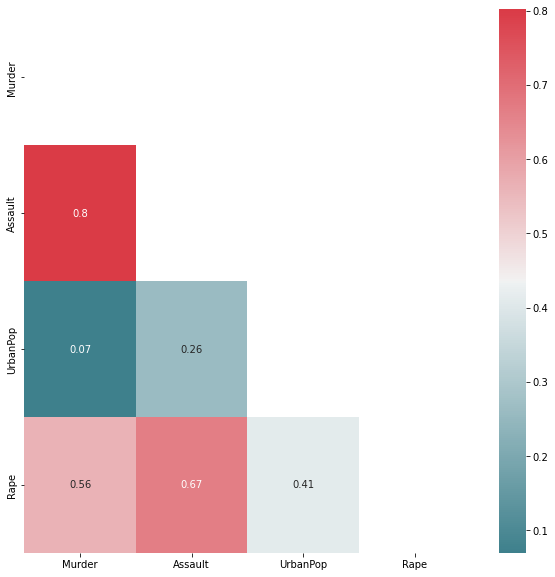

In [7]:
# Get cities from the dataframe index
cities = df.index

# Calculate the correlation matrix
corr_df = df.corr()

# Get the labels from the correlation dataframe
labels = corr_df.columns

# Create a mask for the upper triangle of the correlation matrix
mask_ut = np.triu(np.ones(corr_df.shape)).astype(bool)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, mask=mask_ut, annot=True, cmap=sns.diverging_palette(210, 10, as_cmap=True))
plt.show()


The correlation heatmap unveils several significant patterns within the dataset. 

1. **Strong Relationships**: A notable positive correlation exists between the arrest rates for **assault** and **murder** (0.80), indicating a strong relationship between these two crime categories. This suggests that increases in assault rates may be associated with higher murder rates.

2. **Assault and Rape**: The arrest rate for **assault** also shows a robust positive correlation with the arrest rate for **rape** (0.67), implying that regions with higher assault rates tend to experience higher rates of rape arrests.

3. **Moderate Correlations**: A moderate positive correlation is observed between the arrest rates for **murder** and **rape** (0.56). This suggests a potential link between these two types of violent crime.

4. **Urban Population Dynamics**: The percentage of the **urban population** exhibits a moderate positive correlation with the arrest rate for **rape** (0.41), indicating that higher urbanization may be associated with increased rape arrests. In contrast, its correlation with assault arrests is weaker (0.26) and nearly negligible with murder arrests (0.07).

These findings highlight the intricate interrelationships among different crime rates and urban demographics in the dataset, suggesting that certain patterns may warrant further investigation into the socio-economic factors influencing these crimes.


### Principal Component Analysis (PCA)

Given the strong correlations among the input variables in the dataset, employing Principal Component Analysis (PCA) proves to be highly beneficial. This dimensionality reduction technique transforms the original correlated features into a new set of uncorrelated variables, known as principal components. 

By doing so, PCA effectively captures the most significant patterns of variation in the data while minimizing redundancy. In scenarios where multicollinearity exists—where predictors are interrelated—PCA helps mitigate these issues by generating orthogonal components that retain as much variance as possible from the original data. 

This transformation allows for a more compact representation of the dataset, making it easier to interpret and potentially enhancing the performance of subsequent analytical or modeling tasks. Consequently, implementing PCA is a valuable approach for streamlining the dataset and improving the efficiency and effectiveness of downstream analyses (HyperionDev, 2021).


In [8]:
# Set float data to be displayed with 2 decimal points
np.set_printoptions(precision=2)

# Select data to be transformed, excluding the 'City' column
X = df.values.squeeze()

# Create PCA transformation model
pca = PCA()

# Fit the model and transform the data
X_trans = pca.fit_transform(X)

# Create a new DataFrame from the transformed data
df_pca = pd.DataFrame(X_trans)

# View the transformed data
df_pca.head()


,0,1,2,3
0,64.802164,11.448007,-2.494933,2.407901
1,92.827450,17.982943,20.126575,-4.094047
2,124.068216,-8.830403,-1.687448,-4.353685
3,18.340035,16.703911,0.210189,-0.520994
4,107.422953,-22.520070,6.745873,-2.811826


In [9]:
# Calculate the standard deviation of the PCA-transformed data
std = df_pca.describe().transpose()["std"]

# Print the standard deviation
print(f"Standard deviation: {std.values}")

# Print the proportion of variance explained by each principal component
print(f"\nProportion of Variance Explained: {pca.explained_variance_ratio_}")

# Print the cumulative proportion of variance explained
print(f"\nCumulative Proportion: {np.cumsum(pca.explained_variance_)}")


Standard deviation: [83.73 14.21  6.49  2.48]

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


### Biplot

The biplot visualizes the importance of each feature in the PCA transformation by displaying arrows corresponding to the eigenvectors. In this plot, the length of the arrows signifies the significance of the features: longer arrows represent features that have a greater influence on the principal components. This allows for a clearer understanding of how each feature contributes to the overall variance captured by the PCA model.


In [10]:
# Biplot function
def biplot(score, coeff, labels=None, points=None):
    """
    Create a biplot to visualize the results of PCA.

    Parameters:
    score (numpy.ndarray): The PCA scores for the samples.
    coeff (numpy.ndarray): The PCA coefficients (loadings) for the features.
    labels (list, optional): Labels for the features. If None, defaults to "Var1", "Var2", etc.
    points (list, optional): Not used in this function. Placeholder for additional points.

    Returns:
    None: Displays the biplot.
    """
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(15, 15))

    ax.scatter(xs * scalex, ys * scaley, s=5)

    for i in range(len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i] * scalex, ys[i] * scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, f"Var{i + 1}", color='green', ha='center', va='center')
        else:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: example_plots.ipynb, 14-015 Capstone Project - Unsupervised Machine Learning. [Educational notes]. Retrieved from Dropbox-NK23110009394.


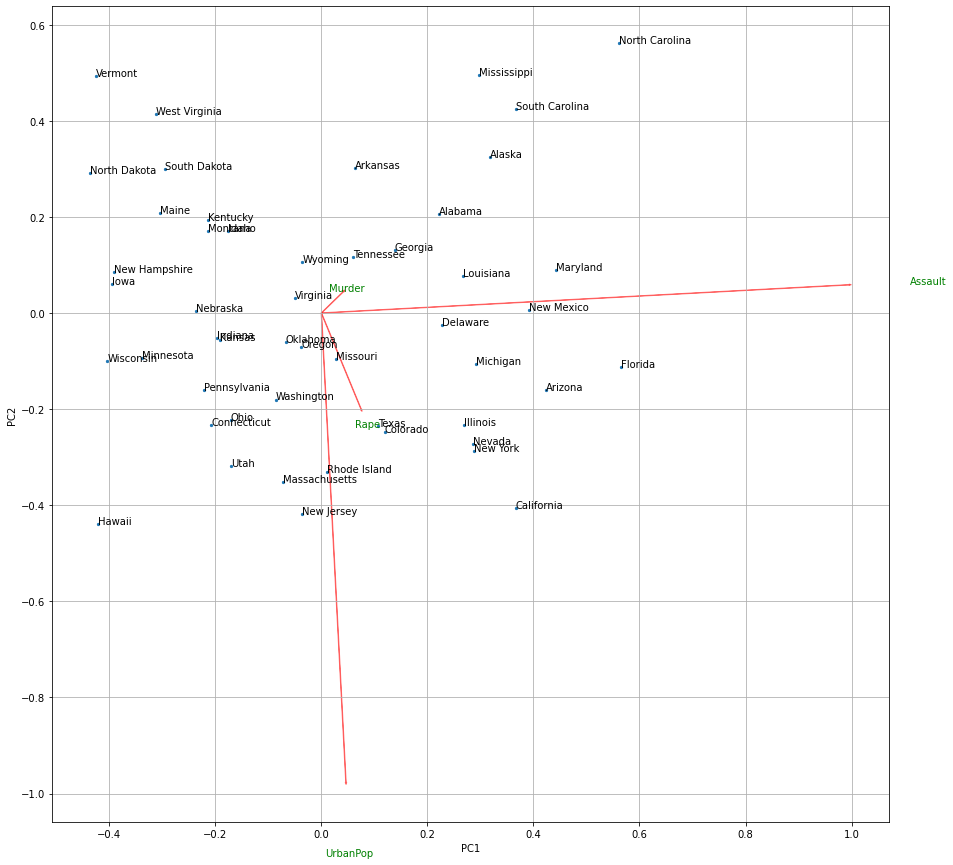

In [11]:
# Create and display the biplot
biplot(X_trans[:, 0:2], np.transpose(pca.components_[0:2, :]), list(labels), list(cities))
plt.show()


Upon analyzing the biplot, it is clear that the features "Assault" and "UrbanPop" stand out as the most significant, evidenced by their longer arrows in the visualization. These longer arrows indicate a stronger influence on the principal components compared to other features.

The significance of these features can be quantified as follows:

In [12]:
# Feature Importance

# Adjust the display precision to show more decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Access the absolute values of the components for the first two principal components
pc1 = abs(pca.components_[0])
pc2 = abs(pca.components_[1])

# Create a DataFrame to store feature importance
feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2

# Display the feature importance DataFrame
feat_df

# Adapted from: example_plots.ipynb, 14-015 Capstone Project - Unsupervised Machine Learning. 
# [Educational notes]. Retrieved from Dropbox-NK23110009394.


,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


The table above indicates that **Assault** has a substantial impact on the first principal component, while **UrbanPop** plays a crucial role in the second component. These insights are consistent with the observations made during the biplot analysis. Furthermore, the summarized statistics previously discussed reveal that the mean values of these features are significantly higher than those of the other variables. This disparity suggests that **Assault** and **UrbanPop** may dominate the analysis, potentially overshadowing the contributions of other important features.


### Standardization of Data

In order to address the influence of certain features that may dominate the analysis, we apply data standardization. This process scales each feature to have a mean of zero and a standard deviation of one, ensuring that all features contribute equally to the analysis. By standardizing the data, we eliminate any bias introduced by differing scales, allowing for a more balanced comparison of feature importance and relationships.


In [13]:
# Create the standardization model and fit the data
X_std = StandardScaler().fit_transform(X)

# Create the PCA model for the standardized data and fit it
std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

# Create a DataFrame of the standardized and fitted data and view it
df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

# Adapted from: example_plots.ipynb, 14-015 Capstone Project - Unsupervised Machine Learning. 
# [Educational notes]. Retrieved from Dropbox-NK23110009394.


,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


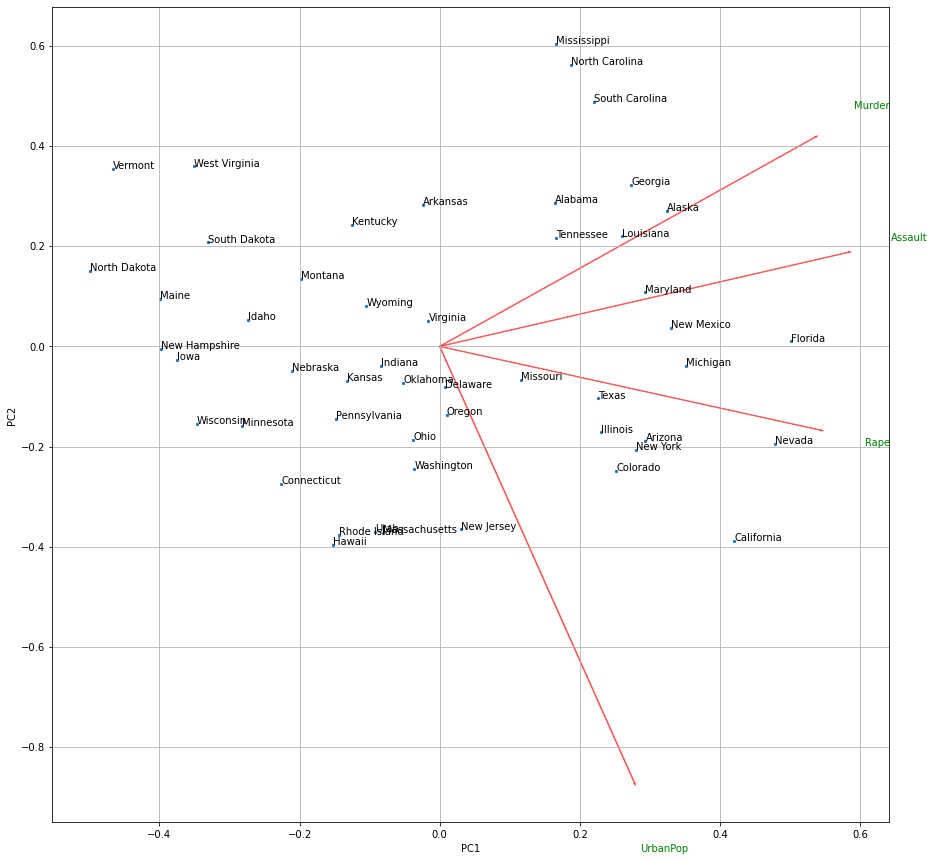

In [14]:
# Plot the biplot of the standardized PCA model
biplot(X_std_trans[:, 0:2], np.transpose(std_pca.components_[0:2, :]), list(labels))
plt.show()


The results from the standardized data reveal a broader range of variables contributing to the explained variance. This change is primarily due to the diminished impact of previously dominant large values on the analysis.

Now, let’s compare the quantified feature importance once more.

In [15]:
# Feature Importance Analysis

# Calculate the absolute values of the first and second principal component coefficients
pc1 = abs(std_pca.components_[0])
pc2 = abs(std_pca.components_[1])

# Create a DataFrame to hold feature names and their importance scores for the first two principal components
feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2

# Display the feature importance DataFrame
feat_df

# Adapted from: example_plots.ipynb, 14-015 Capstone Project - Unsupervised Machine Learning. [Educational notes]. Retrieved from Dropbox-NK23110009394.


,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


Upon examining the feature importance, it is evident that most variables contribute fairly evenly to the principal components. Notably, **UrbanPop** and **Rape** exhibit comparatively lower significance, indicating that they have less impact on the variance explained by the components.



### Cumulative Variance and Scree Plots for Principal Component Selection

Cumulative variance and scree plots are essential tools for determining the optimal number of principal components to retain in our analysis. These visualizations will help us identify how much variance is explained by each


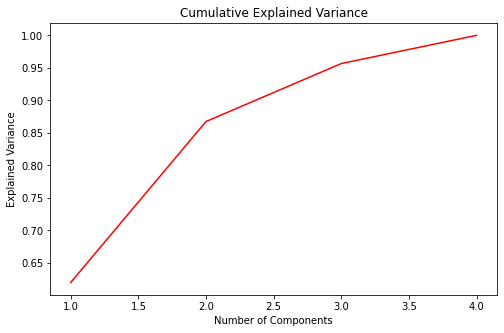

In [16]:
# Cumulative Variance Plot
plt.figure(figsize=(8, 5))
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.plot(range(1, len(std_pca.explained_variance_ratio_) + 1),
         np.cumsum(std_pca.explained_variance_ratio_), c='red')
plt.title("Cumulative Explained Variance")
plt.show()

# Adapted from: Kmeans.ipynb, L3T08 - Unsupervised Learning - K-means Clustering. 
# [Educational notes]. Retrieved from Dropbox-NK23110009394.


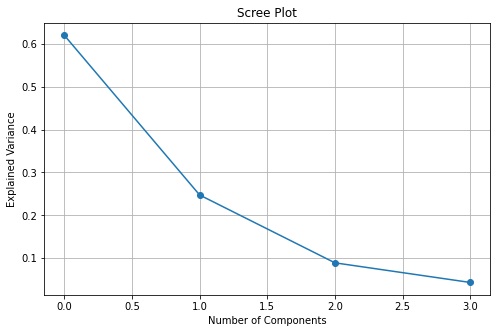

In [17]:
# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(std_pca.explained_variance_ratio_, marker='o')  # Added marker for better visibility
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title("Scree Plot")
plt.grid()  # Optional: adds gridlines for easier reading
plt.show()

# Adapted from: Kmeans.ipynb, L3T08 - Unsupervised Learning - K-means Clustering.
# [Educational notes]. Retrieved from Dropbox-NK23110009394.


Based on the above plots, the first three principal components collectively account for approximately 95% of the total variance in the dataset. This substantial proportion of explained variance indicates that these components capture the essential features of the data. 

Therefore, we can proceed with confidence in using them for subsequent cluster analysis, as they effectively represent the underlying structure of the dataset.


### Clustering Analysis

In this section, we apply two distinct clustering techniques to the dataset. The resulting clusters will be thoroughly examined to uncover shared characteristics and differences between the methods. This comparative analysis aims to enhance our understanding of the data's structure and the effectiveness of each clustering approach.


In [18]:
# Create a DataFrame consisting solely of the principal components for further analysis - display the first few rows
pca_df = pd.DataFrame(X_std_trans[:, 0:3], index=df.index)
pca_df.head()


,0,1,2
City,,,
Alabama,0.986,1.133,-0.444
Alaska,1.950,1.073,2.040
Arizona,1.763,-0.746,0.055
Arkansas,-0.141,1.120,0.115
California,2.524,-1.543,0.599


#### K-Means Clustering

This section focuses on identifying the optimal number of clusters for K-Means clustering using an elbow plot. The elbow plot visually illustrates the relationship between the number of clusters and the corresponding within-cluster sum of squares, aiding in the selection of an ideal 


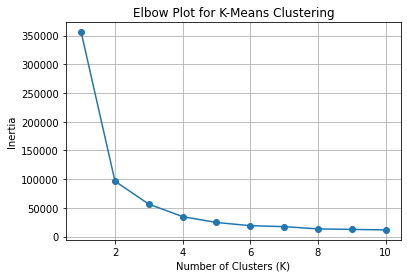

In [19]:
# Function to evaluate K-Means model
def eval_kmeans(x, k, r):
    """
    Evaluates the K-Means clustering model by fitting it to the data.

    Parameters:
    - x: array-like, shape (n_samples, n_features)
        The input data for clustering.
    - k: int
        The number of clusters.
    - r: int
        Random state for reproducibility.

    Returns:
    - inertia: float
        The sum of squared distances of samples to their closest cluster center.
    """
    kmeans = KMeans(n_clusters=k, random_state=r, n_init='auto')
    kmeans.fit(x)
    return kmeans.inertia_

# Function to create an elbow plot for K-Means
def elbow_kmeans(x, max_k=10, r=123):
    """
    Creates an elbow plot to determine the optimal number of clusters for K-Means.

    Parameters:
    - x: array-like, shape (n_samples, n_features)
        The input data for clustering.
    - max_k: int, optional (default=10)
        The maximum number of clusters to evaluate.
    - r: int, optional (default=123)
        Random state for reproducibility.
    """
    within_cluster_vars = [eval_kmeans(x, k, r) for k in range(1, max_k + 1)]
    plt.plot(range(1, max_k + 1), within_cluster_vars, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot for K-Means Clustering')
    plt.grid()
    plt.show()

# Plot elbow curve
elbow_kmeans(X)

# Adapted from: Kmeans.ipynb, L3T08 - Unsupervised Learning - K-means Clustering. [Educational notes]. Retrieved from Dropbox-NK23110009394.


The elbow plot, generated for \( k \) values ranging from 2 to 10, illustrates an elbow-like pattern between \( k=2 \) and \( k=4 \). However, within this range, pinpointing the most optimal number of clusters remains ambiguous.

To clarify this uncertainty, we will conduct further analysis using the silhouette score, which provides a metric for evaluating the quality of clusters and can help identify the most suitable candidates for the optimal number of clusters. Additionally, the scatter plot of the first two principal components will be utilized to 


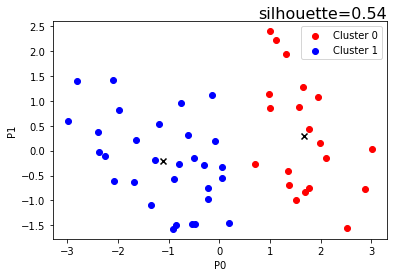

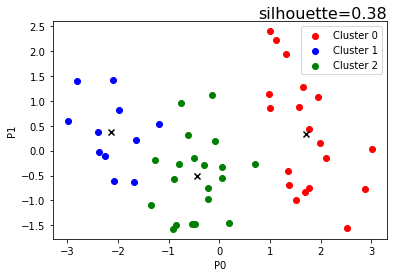

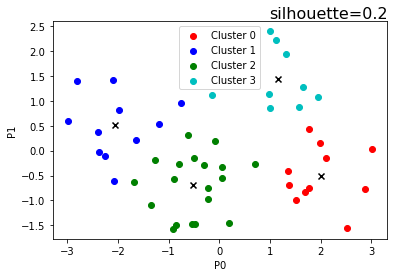

In [20]:
# Select data for clustering - 1D array
x_1 = pca_df[[0, 1]].values.reshape(-1, 2)

def scatter_kmeans(x, k, r=123):
    """Function to perform K-Means clustering and plot results.

    Args:
        x (array-like): Data for clustering.
        k (int): Number of clusters.
        r (int, optional): Random state for reproducibility. Defaults to 123.
    """
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r, n_init='auto')
    y_pred = kmeans.fit_predict(x)
    
    colours = 'rbgcmy'
    for c in range(k):
        plt.scatter(x[y_pred == c, 0], x[y_pred == c, 1], 
                    c=colours[c], label='Cluster {}'.format(c))
        plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], 
                    marker='x', c='black')

    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('P0')
    plt.ylabel('P1')
    plt.legend()
    plt.show()

# Scatter plot for a range of k values
for k in range(2, 5):
    scatter_kmeans(x_1, k, r=0)

# Adapted from: Kmeans.ipynb, L3T08 - Unsupervised Learning - K-means Clustering. 
# [Educational notes]. Retrieved from Dropbox-NK23110009394.


The analysis of the scatter plots reveals that the highest silhouette score occurs at \( k=2 \). In this visualization, two well-defined clusters are evident, separated by a significant distance that underscores their distinctiveness. In contrast, when \( k=3 \) and \( k=4 \), the clusters appear more closely spaced, indicating a lack of clear separation and overlap between them. This suggests that increasing the number of clusters beyond two may not effectively capture the underlying structure of the data.


### K-Means Cluster Plot

This plot visualizes the results of the K-Means clustering algorithm applied to the data. Each point represents a data observation, while the different colors indicate distinct clusters formed by the algorithm. Additionally, the black crosses mark the centroids of each cluster, highlighting the central points around which the observations are grouped. The arrangement of the clusters provides insights into the relationships and separations among the data points.


Text(0, 0.5, 'Dim 1')

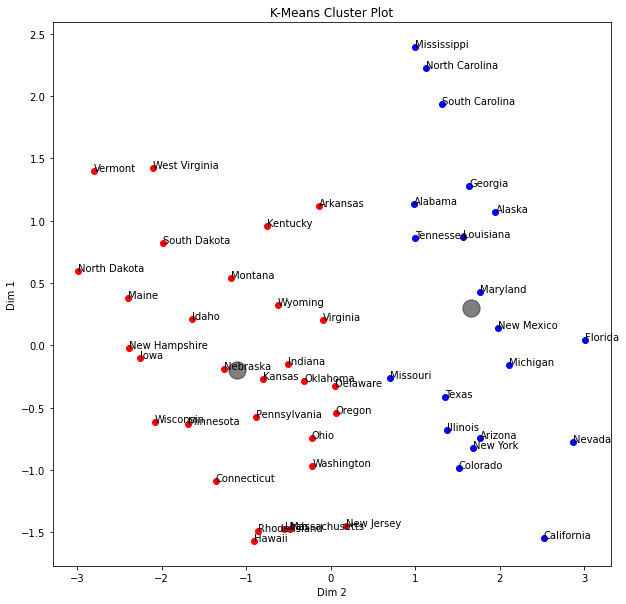

In [21]:
# Extract the first two dimensions for clustering
x = X_std_trans[:, 0]
y = X_std_trans[:, 1]

# Fit K-Means clustering
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(pca_df)
centroids = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots(figsize=(10, 10))
colours = 'rb'

for i in range(k):
    ax.scatter(x[cluster_labels == i], y[cluster_labels == i], c=colours[i])
    ax.scatter(centroids[i, 0], centroids[i, 1], marker='o', c='black', s=300, alpha=0.5)

# Annotate points with city names
for i in range(len(x)):
    txt = cities[i]
    ax.annotate(txt, (x[i], y[i]))

# Set plot title and labels
ax.set_title("K-Means Cluster Plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")

# Adapted from: https://www.kaggle.com/code/sanikamal/principal-component-analysis-with-kmeans


### Boxplots of Crime Rate Distributions by Cluster

This section presents boxplots that illustrate the distribution of crime rates for states classified into Cluster 0 and Cluster 1. These visualizations enable a comparative analysis of the crime rate distributions between the two clusters, highlighting variations and potential outliers within the data.


<Axes: xlabel='cluster_labels', ylabel='Assault'>

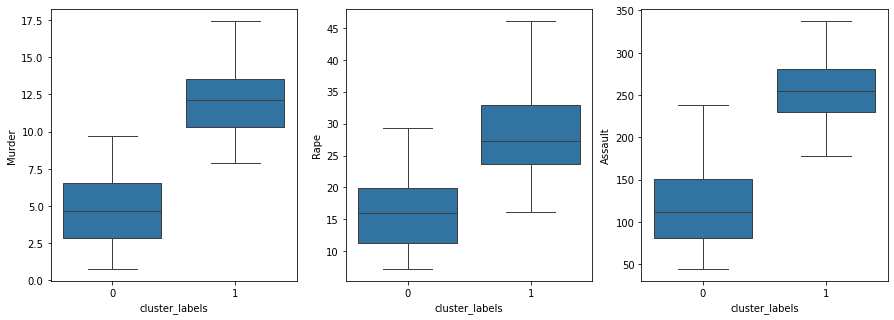

In [22]:
# Assign cluster labels to the DataFrame
df['cluster_labels'] = cluster_labels

# Create subplots for the boxplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Boxplot for the distribution of Murder rates by cluster
sns.boxplot(x='cluster_labels', y='Murder', data=df, ax=ax[0])

# Boxplot for the distribution of Rape rates by cluster
sns.boxplot(x='cluster_labels', y='Rape', data=df, ax=ax[1])

# Boxplot for the distribution of Assault rates by cluster
sns.boxplot(x='cluster_labels', y='Assault', data=df, ax=ax[2])


The analysis of the box plots reveals clear trends among the states categorized into Group 0 and Group 1:

- **Group 0:** Cities in this group exhibit characteristics associated with low-risk profiles, showing significantly lower rates of murders, assaults, and rapes compared to those in Group 1. This suggests a relatively safer environment in these areas.

- **Group 1:** In contrast, cities classified in Group 1 display higher incidences of these crimes, indicating a more elevated risk environment. As a result, these areas may be classified as high-risk due to their comparatively high crime rates.


### Cities Classified in Group 0 and Group 1


In [23]:
# Loop through each cluster to retrieve and display city names
for i in range(k):
    # Get the indices of data points that belong to the current cluster
    group_indices = np.argwhere(cluster_labels == i).transpose()[0]
    
    # Retrieve the city names corresponding to the current cluster's indices
    group = np.array(cities)[group_indices]
    
    # Print the list of cities in the current cluster
    print(f'Group {i} Cities: ', *group, sep=", ")
    print("\n")  # Print a newline for better readability between groups


Group 0 Cities: , Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming


Group 1 Cities: , Alabama, Alaska, Arizona, California, Colorado, Florida, Georgia, Illinois, Louisiana, Maryland, Michigan, Mississippi, Missouri, Nevada, New Mexico, New York, North Carolina, South Carolina, Tennessee, Texas




The consistency observed between the box plot and the earlier bar plot analysis highlights a strong agreement in the insights derived from the dataset. This alignment across different visualization techniques adds credibility to the identified trends and patterns. Such coherence not only reinforces the reliability of the analytical results but also enhances our confidence in the interpretations drawn from the data.


#### Hierarchical Clustering Analysis

This section focuses on identifying the optimal number of clusters using a dendrogram visualization. The analysis employs three common linkage criteria—single, average, and complete—and two widely used distance metrics: Euclidean and Manhattan (city block). This approach allows for a comprehensive understanding of the clustering structure within the dataset.


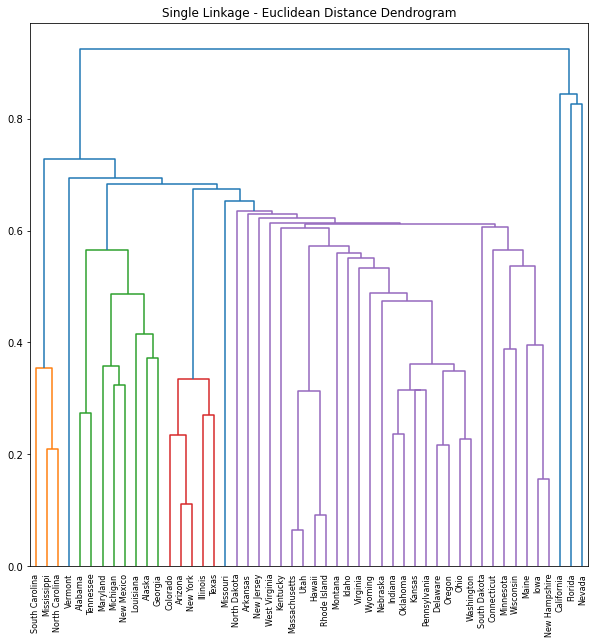

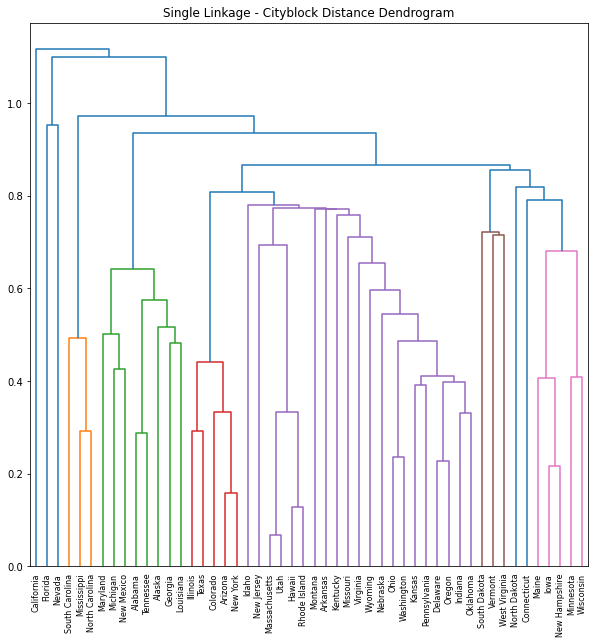

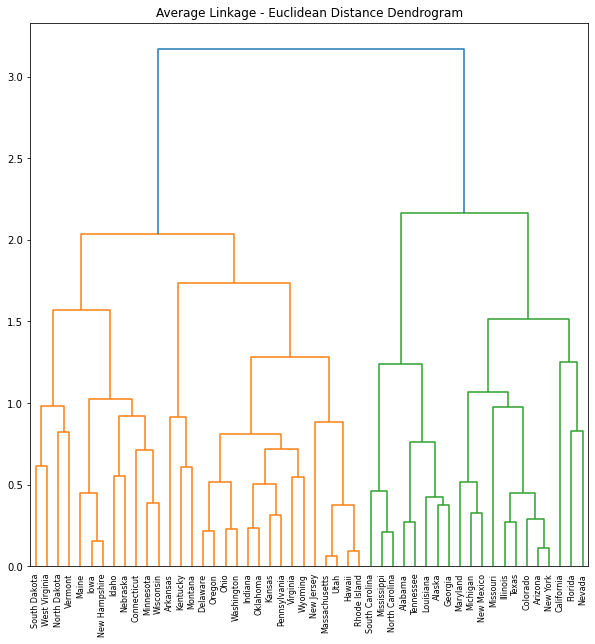

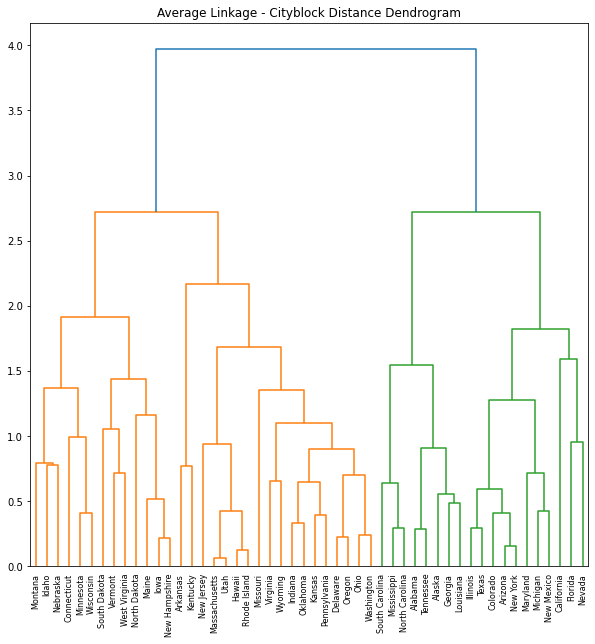

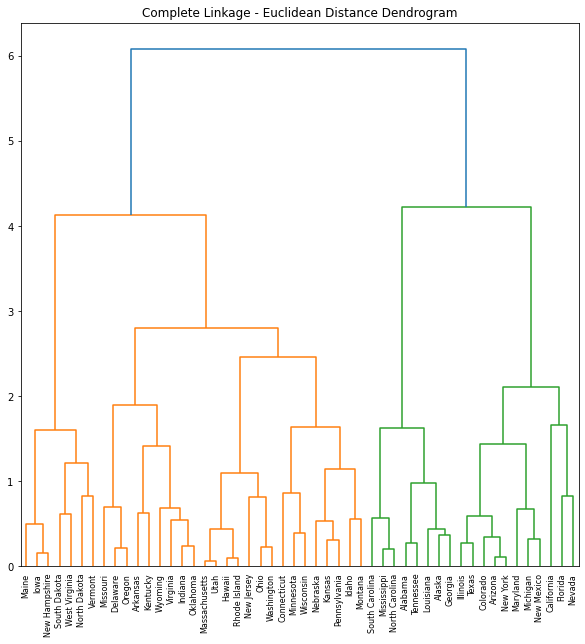

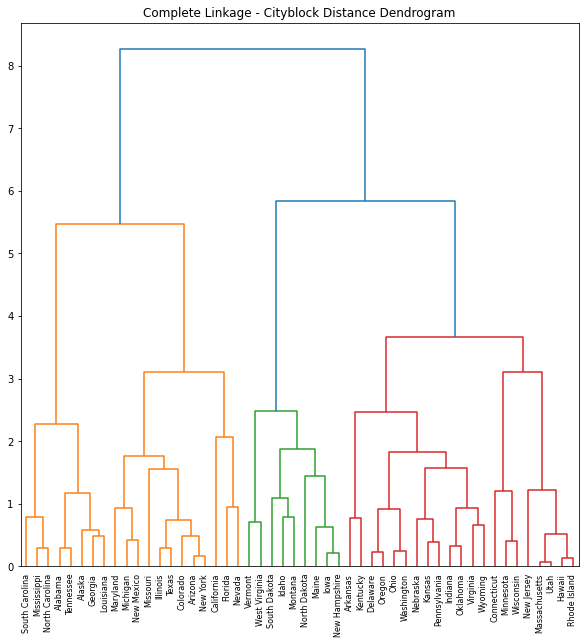

In [24]:
# List of linkage methods and distance metrics to be used for the dendrogram plots
linkage_methods = ['single', 'average', 'complete']
distance_metrics = ['euclidean', 'cityblock']

# Loop through each combination of linkage method and distance metric to plot dendrograms
for linkage_method in linkage_methods:
    for distance_metric in distance_metrics:
        # Create a new figure for each plot
        plt.figure(figsize=(10, 10))
        
        # Set the title for the dendrogram plot
        plt.title(f"{linkage_method.capitalize()} Linkage - {distance_metric.capitalize()} Distance Dendrogram")
        
        # Generate the dendrogram using the specified linkage method and distance metric
        dendrogram(linkage(x_1, method=linkage_method, metric=distance_metric), labels=pca_df.index)
        
        # Display the plot
        plt.show()

# Adapted from: Iris.ipynb, L3T08 - Unsupervised Learning - Hierarchical Clustering. [Compulsory Task 1]. Retrieved from Dropbox-NK23110009394.


Among the six dendrogram plots presented above, three clearly indicate the presence of two distinct clusters within the data. The differentiation between these clusters is substantiated by the lengths of the vertical blue lines in the three dendrograms representing two clusters; these lines are the longest in all plots, except for the final dendrogram, which illustrates three clusters.

Importantly, one of these dendrograms utilizes commonly adopted linkage and distance metrics, specifically complete linkage and Euclidean distance (HyperionDev, 2021). This consistency aligns with the findings from the K-Nearest Neighbors technique, which also suggests a k value of 2. Such alignment serves to reinforce and validate the clustering approach employed in this analysis.


### Hierarchical Cluster Plot

This visualization aids in identifying the optimal number of clusters, providing insights into the relationships between data points and how they are grouped based on the chosen linkage and distance metrics.


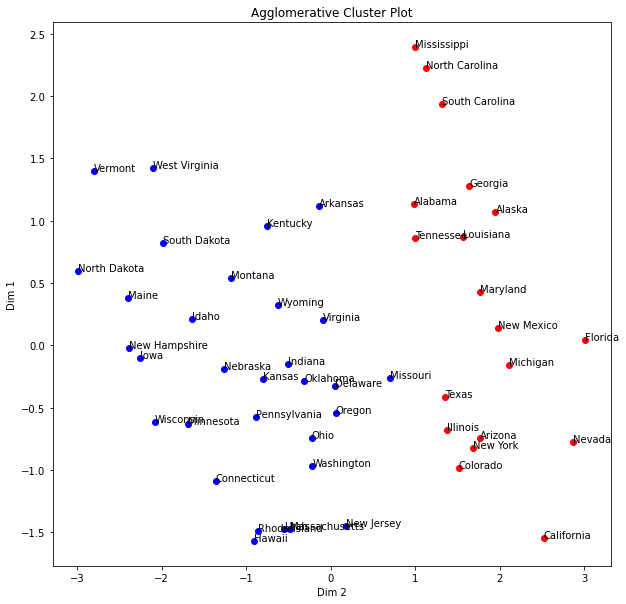

In [25]:
# Perform Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
cluster_labels = cluster.fit_predict(pca_df)

# Create a plot for the clusters
fig, ax = plt.subplots(figsize=(10, 10))
colours = 'rb'

# Scatter plot for each cluster
for i in range(0, 2):  # Update range to reflect the number of clusters
    ax.scatter(x[cluster_labels == i], y[cluster_labels == i], c=colours[i])

# Annotate each data point with the corresponding city name
for i in range(len(x)):
    txt = cities[i]
    ax.annotate(txt, (x[i], y[i]))

# Set plot title and axis labels
ax.set_title("Agglomerative Cluster Plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")

# Display the plot
plt.show()

# Adapted from: https://www.kaggle.com/code/sanikamal/principal-component-analysis-with-kmeans

When comparing the cluster plots generated from the K-Nearest Neighbors (KNN) and Hierarchical Clustering techniques, a significant similarity in their clustering outcomes is observed, with one notable exception: Missouri. 

In both clustering methods, the majority of cities are consistently grouped into clusters that exhibit similar characteristics. However, Missouri is identified as an outlier, being classified as part of the 'high-risk' group only in the results of the Hierarchical Clustering technique.

This discrepancy emphasizes the sensitivity of clustering algorithms to subtle variations in data and methodology. It serves as a reminder of the importance of thorough consideration and validation when interpreting clustering outcomes.


### References

1. HyperionDev. (2021). Unsupervised Learning- Principlal Component Analysis. [Educational notes]. Retrieved from Dropbox-NK23110009394.

2. HyperionDev. (2021). Hierachical Clustering. [Educational notes]. Retrieved from Dropbox-NK23110009394.